In [5]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import folium

In [6]:
data = pd.read_csv("globalterrorismdb_0718dist.csv", encoding =('ISO-8859-1'))

In [7]:
# Rename to make the dataset more readable
data.rename(columns={'eventid':'Event_ID','iyear':'Year','imonth':'Month','iday':'Day','approxdate':'Approximate_Date',
                     'country_txt':'Country','provstate':'State','city':'City','latitute':'Latitude','longitude':'Longitude',
                     'success':'Success','location':'Location','region_txt':'Region','attacktype1_txt':'AttackType',
                     'target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group_Name',
                     'targtype1_txt':'Target_type','targsubtype1_txt':'Target_subtype','target1':'Target',
                     'dbsource':'Source','corp1':'Corporation','motive':'Motive','weaptype1_txt':'Weapon_type',
                     'weapdetail':'Weapon_Detail','motive':'Motive','natlty1_txt':'Nationality'}, inplace=True)

In [8]:
data.columns

Index(['Event_ID', 'Year', 'Month', 'Day', 'Approximate_Date', 'extended',
       'resolution', 'country', 'Country', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'Source', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [9]:
data.head()

,Event_ID,Year,Month,Day,Approximate_Date,extended,resolution,country,Country,region,...,addnotes,scite1,scite2,scite3,Source,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


In [10]:
data.describe()

,Event_ID,Year,Month,Day,extended,country,region,latitude,Longitude,specificity,...,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.210000e+03,1210.000000,1210.000000,1210.000000,1210.000000,1210.000000,1210.000000,1190.000000,1190.000000,1209.000000,...,0.0,7.000000,0.0,0.0,57.000000,44.000000,1209.000000,1209.000000,1209.000000,1209.000000
mean,1.970593e+11,1970.534711,5.662810,14.782645,0.029752,248.118182,3.382645,34.806398,-59.408396,1.075269,...,NaN,116714.285714,NaN,NaN,2.456140,19.954545,-4.604632,-4.496278,0.277916,-3.555831
std,6.215254e+07,0.628153,3.295036,9.185877,0.169973,139.745770,3.410905,20.475755,55.349643,0.529080,...,NaN,131347.775372,NaN,NaN,0.946236,49.230806,4.553673,4.680366,0.757206,4.793283
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,11.000000,1.000000,-37.813187,-157.818968,1.000000,...,NaN,12000.000000,NaN,NaN,2.000000,1.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.970053e+11,1970.000000,3.000000,6.000000,0.000000,217.000000,1.000000,34.097866,-95.365295,1.000000,...,NaN,47500.000000,NaN,NaN,2.000000,1.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,1.970112e+11,1970.000000,5.000000,15.000000,0.000000,217.000000,1.000000,39.930771,-73.931351,1.000000,...,NaN,100000.000000,NaN,NaN,2.000000,1.000000,-9.000000,-9.000000,0.000000,0.000000
75%,1.971061e+11,1971.000000,8.000000,23.000000,0.000000,217.000000,8.000000,42.464047,-5.981749,1.000000,...,NaN,105000.000000,NaN,NaN,2.000000,3.250000,0.000000,0.000000,1.000000,1.000000
max,1.972032e+11,1972.000000,12.000000,31.000000,1.000000,603.000000,12.000000,59.332788,151.206890,5.000000,...,NaN,400000.000000,NaN,NaN,5.000000,187.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
#To display the number of unique values in a column
data.nunique()

Event_ID            1210
Year                   3
Month                 13
Day                   32
Approximate_Date      11
                    ... 
INT_LOG                3
INT_IDEO               3
INT_MISC               3
INT_ANY                3
related               48
Length: 135, dtype: int64

In [12]:
cols = ['Event_ID', 'Year', 'Month', 'Day','Country','State','City','Latitude','Longitude','Region','AttackType',
        'Target_type','Target_subtype','Target','Group_Name','Nationality','Motive','Weapon_type','Killed','Wounded',
        'Data_Source','Weapon_Detail']

In [13]:
clean_data = pd.DataFrame(data=data, columns=cols)

In [14]:
clean_data.head()

,Event_ID,Year,Month,Day,Country,State,City,Latitude,Longitude,Region,...,Target_subtype,Target,Group_Name,Nationality,Motive,Weapon_type,Killed,Wounded,Data_Source,Weapon_Detail
0,197000000001,1970,7,2,Dominican Republic,NaN,Santo Domingo,NaN,-69.951164,Central America & Caribbean,...,Named Civilian,Julio Guzman,MANO-D,Dominican Republic,NaN,Unknown,1.0,0.0,NaN,NaN
1,197000000002,1970,0,0,Mexico,Federal,Mexico city,NaN,-99.086624,North America,...,"Diplomatic Personnel (outside of embassy, cons...","Nadine Chaval, daughter",23rd of September Communist League,Belgium,NaN,Unknown,0.0,0.0,NaN,NaN
2,197001000001,1970,1,0,Philippines,Tarlac,Unknown,NaN,120.599741,Southeast Asia,...,Radio Journalist/Staff/Facility,Employee,Unknown,United States,NaN,Unknown,1.0,0.0,NaN,NaN
3,197001000002,1970,1,0,Greece,Attica,Athens,NaN,23.762728,Western Europe,...,Embassy/Consulate,U.S. Embassy,Unknown,United States,NaN,Explosives,NaN,NaN,NaN,Explosive
4,197001000003,1970,1,0,Japan,Fukouka,Fukouka,NaN,130.396361,East Asia,...,Embassy/Consulate,U.S. Consulate,Unknown,United States,NaN,Incendiary,NaN,NaN,NaN,Incendiary


In [15]:
clean_data.shape

(1210, 22)

In [16]:
clean_data.isnull().sum()

Event_ID             0
Year                 0
Month                0
Day                  0
Country              0
State                2
City                 0
Latitude          1210
Longitude           20
Region               0
AttackType           1
Target_type          1
Target_subtype      49
Target              29
Group_Name           1
Nationality          6
Motive             852
Weapon_type          1
Killed             115
Wounded            237
Data_Source       1210
Weapon_Detail      149
dtype: int64

In [17]:
clean_data['Victims'] = clean_data['Wounded'] + clean_data['Killed']

# Nations that have suffered the most terrorist attacks

In [18]:
nationality_top = clean_data[clean_data['Nationality']!='Unknown']
nationality_type = nationality_top['Nationality'].value_counts().reset_index()
nationality_type.rename(columns={"index":"Nationality", "Nationality":"Count"}, inplace=True)
nationality_type

,Nationality,Count
0,United States,813
1,Northern Ireland,69
2,Great Britain,63
3,Germany,43
4,Spain,29
5,Uruguay,23
6,Argentina,20
7,Iran,13
8,Israel,11
9,Soviet Union,10


Text(0, 0.5, 'Nationality')

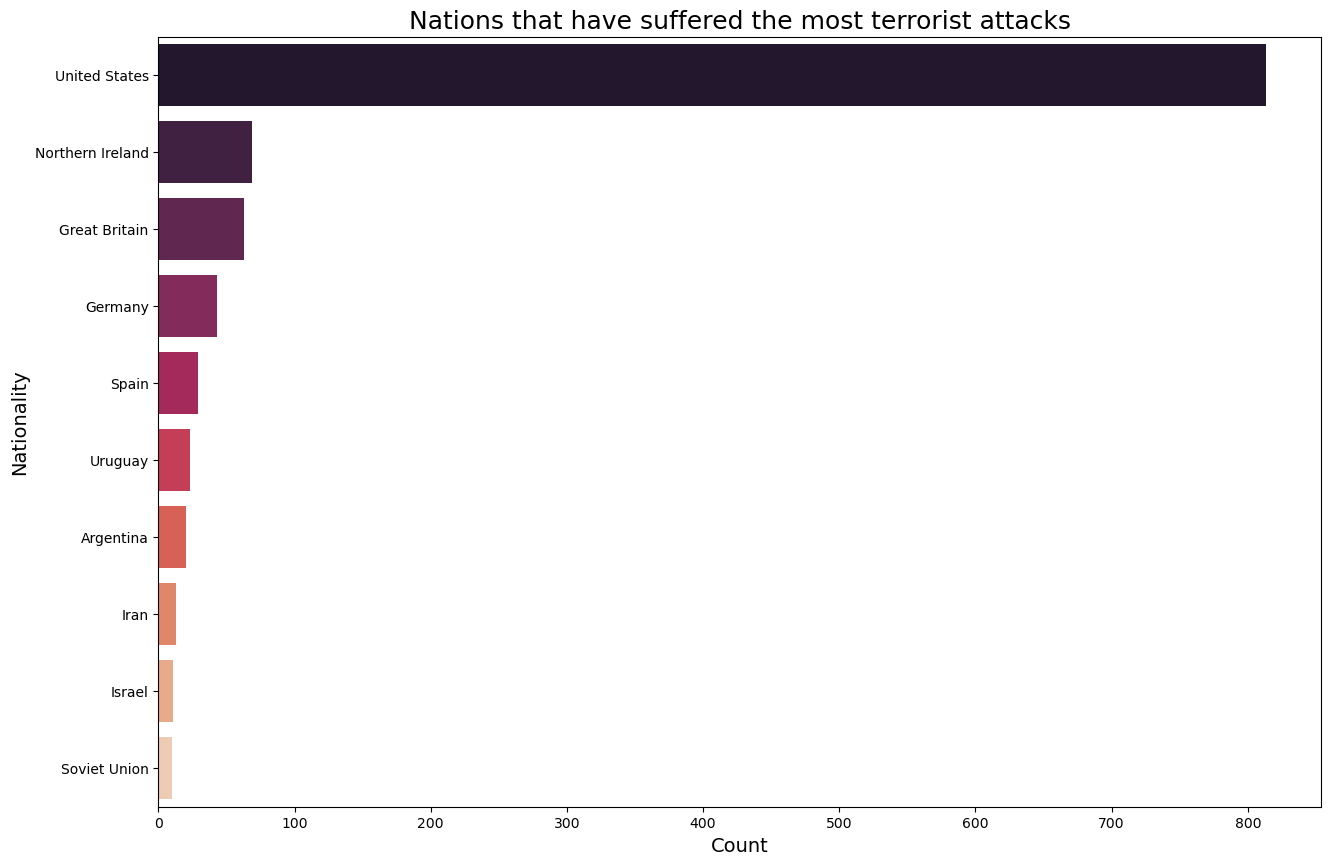

In [46]:
# Visualising the above data
f, axis = plt.subplots(figsize = (15,10))
x = sns.barplot(x="Count", y="Nationality",data=nationality_type[:10],
               palette='rocket').set_title('Nations that have suffered the most terrorist attacks')
plt.title("Nations that have suffered the most terrorist attacks", size=18)
plt.xlabel("Count", size=14)
plt.ylabel("Nationality", size=14)

# Cities where most terrorist attacks took place

In [19]:
cities = clean_data[clean_data['City']!='Unknown']
city_count = cities['City'].value_counts().reset_index()
city_count.rename(columns={"index":"City", "City":"Count"}, inplace=True)
city_count

,City,Count
0,New York City,130
1,Belfast,75
2,Los Angeles,43
3,Montevideo,41
4,Ankara,33
...,...,...
336,Quebec,1
337,Bluefield,1
338,Prairie du Sac,1
339,Stuttgart,1


Text(0, 0.5, 'City')

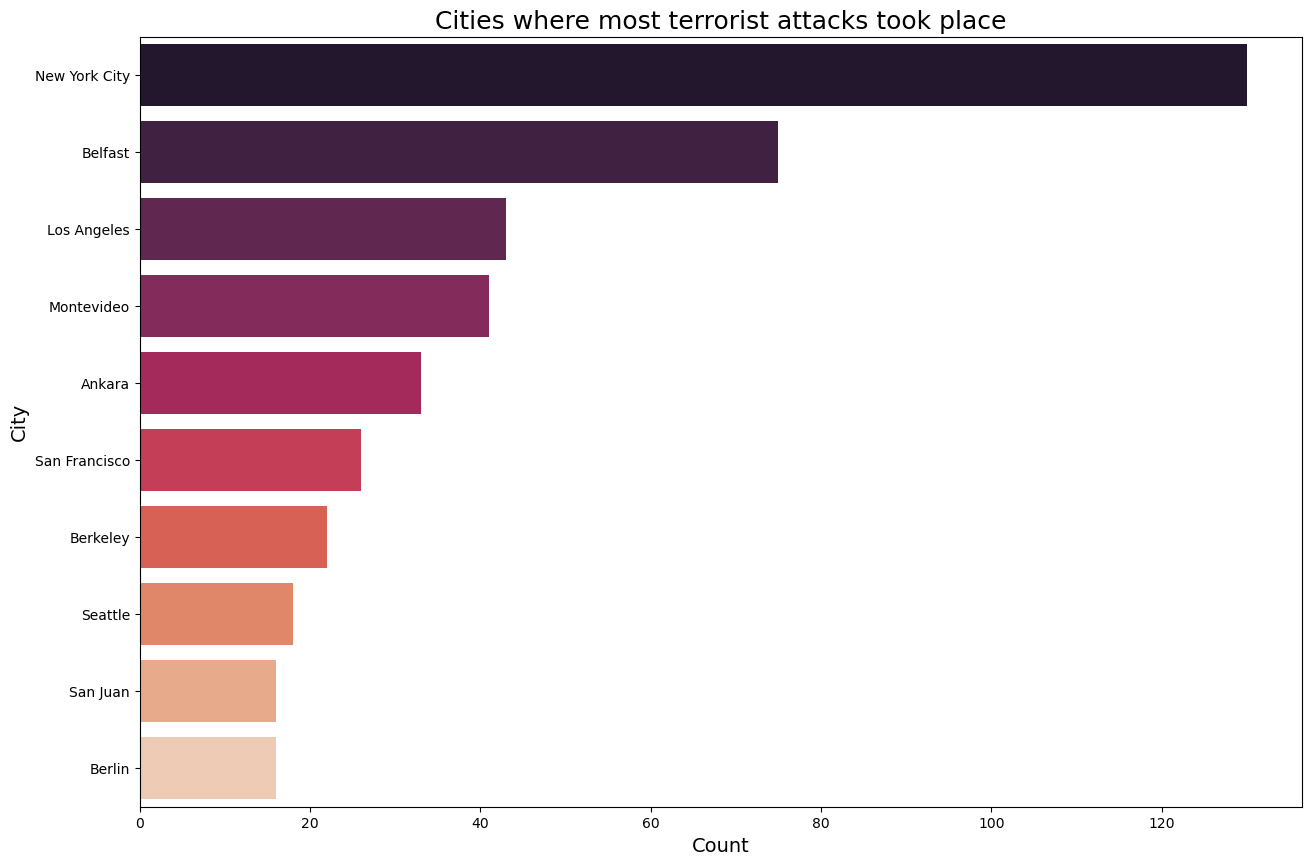

In [45]:
# Visualising the above data
f, axis = plt.subplots(figsize = (15,10))
x = sns.barplot(x="Count", y="City",data=city_count[:10],
               palette='rocket').set_title('Cities where most terrorist attacks took place')
plt.title("Cities where most terrorist attacks took place", size=18)
plt.xlabel("Count", size=14)
plt.ylabel("City", size=14)

# Countries with the most casualities

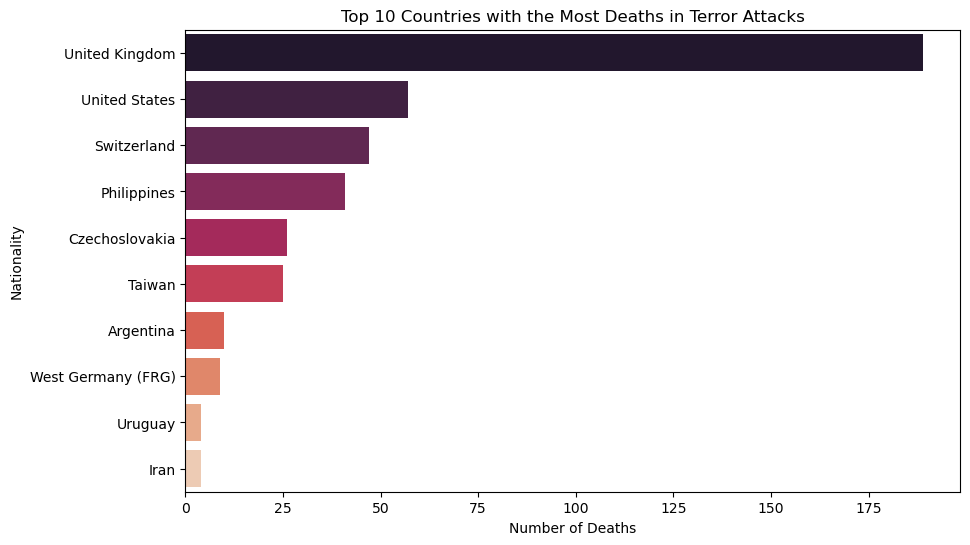

In [84]:
country_deaths = clean_data.groupby('Country')['Killed'].sum().reset_index()
top_countries_deaths = country_deaths.sort_values(by='Killed', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Killed', y='Country', data=top_countries_deaths.head(10), palette='rocket')
plt.xlabel("Number of Deaths")
plt.ylabel("Nationality")
plt.title('Top 10 Countries with the Most Deaths in Terror Attacks')
plt.show()

# Number of people wounded

In [68]:
wounded = clean_data[clean_data['Wounded']!='Unknown']
wound_cnt = wounded['Wounded'].value_counts().reset_index()
wound_cnt.rename(columns={"index":"Wounded", "Wounded":"Count"}, inplace=True)
wound_cnt

,Wounded,Count
0,0.0,890
1,1.0,32
2,2.0,18
3,3.0,11
4,10.0,4
5,7.0,3
6,20.0,2
7,12.0,2
8,17.0,2
9,5.0,1


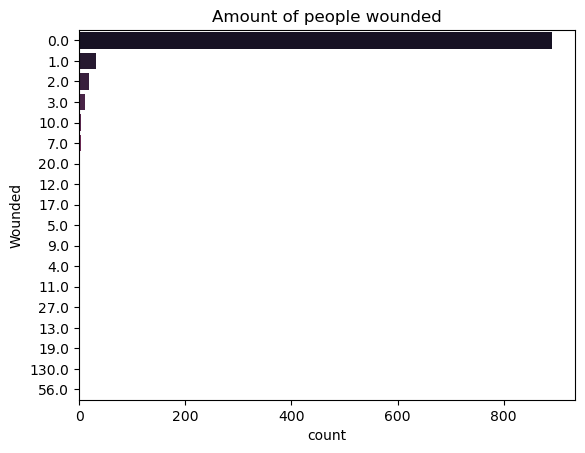

In [72]:
# Visualising the above data
sns.countplot(y='Wounded', data=clean_data, palette='rocket', order=clean_data['Wounded'].value_counts().index)
plt.ylabel("Wounded", size=10)
plt.title('Amount of people wounded', size=12)
plt.show()

# Number of people Killed in terror attacks

In [73]:
kills = clean_data[clean_data['Killed']!='Unknown']
kill_cnt = kills['Killed'].value_counts().reset_index()
kill_cnt.rename(columns={"index":"Killed", "Killed":"Count"}, inplace=True)
kill_cnt

,Killed,Count
0,0.0,881
1,1.0,169
2,2.0,24
3,3.0,6
4,7.0,4
5,4.0,4
6,5.0,2
7,47.0,1
8,36.0,1
9,25.0,1


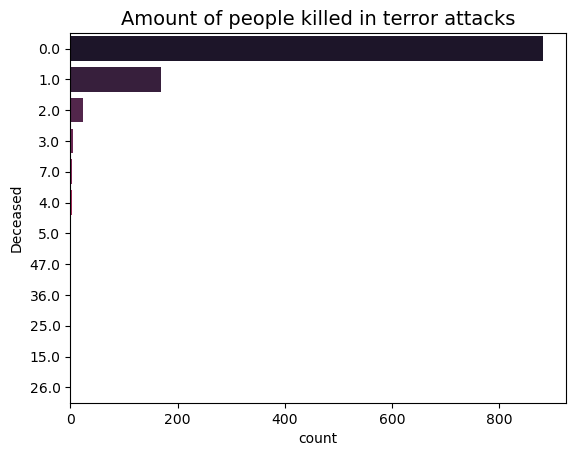

In [79]:
# Visualising the above data
sns.countplot(y='Killed', data=clean_data, palette='rocket', order=clean_data['Killed'].value_counts().index)
plt.ylabel("Deceased", size=10)
plt.title('Amount of people killed in terror attacks', size=14)
plt.show()

# Most prominent terror organizations

In [21]:
terror = clean_data[clean_data['Group_Name']!='Unknown']
terror_grp = terror['Group_Name'].value_counts().reset_index()
terror_grp.rename(columns={"index":"Group_Name", "Group_Name":"Count"}, inplace=True)
terror_grp

,Group_Name,Count
0,Left-Wing Militants,165
1,Irish Republican Army (IRA),95
2,Black Nationalists,82
3,Student Radicals,70
4,Tupamaros (Uruguay),41
...,...,...
105,Siah KAL,1
106,Turkish People's Liberation Front (TPLF)(THKP-C),1
107,Students for a Democratic Society (SDS) (German),1
108,Iranians,1


Text(0, 0.5, 'Group Name')

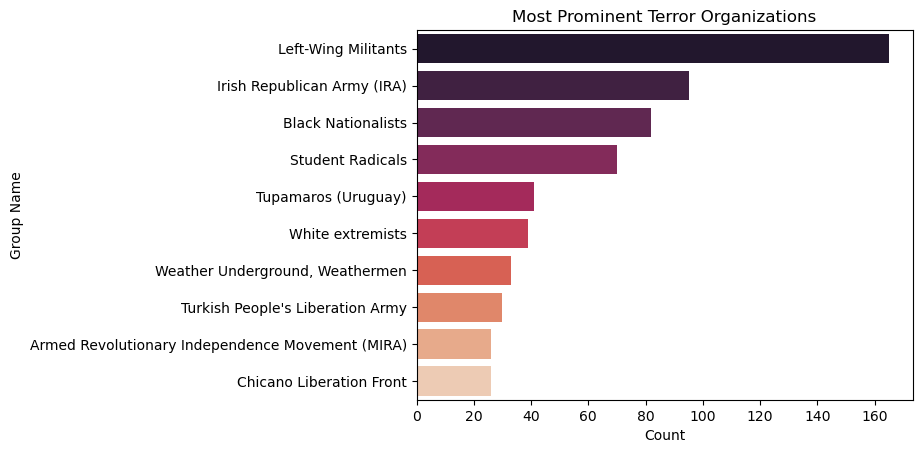

In [48]:
# Visualising the above data
x = sns.barplot(x="Count", y="Group_Name", data=terror_grp[:10], 
                palette='rocket').set_title('Most Prominent Terror Organizations')
plt.xlabel("Count")
plt.ylabel("Group Name")

# Most common weapons used in terror attacks

In [24]:
weapons = clean_data[clean_data['Weapon_type']!='Unknown']
weapon_cnt = weapons['Weapon_type'].value_counts().reset_index()
weapon_cnt.rename(columns={"index":"Weapon_type", "Weapon_type":"Count"}, inplace=True)
weapon_cnt

,Weapon_type,Count
0,Explosives,635
1,Incendiary,276
2,Firearms,210
3,Chemical,4
4,Melee,4
5,Sabotage Equipment,1
6,Vehicle (not to include vehicle-borne explosiv...,1


Text(0, 0.5, 'Weapon Type')

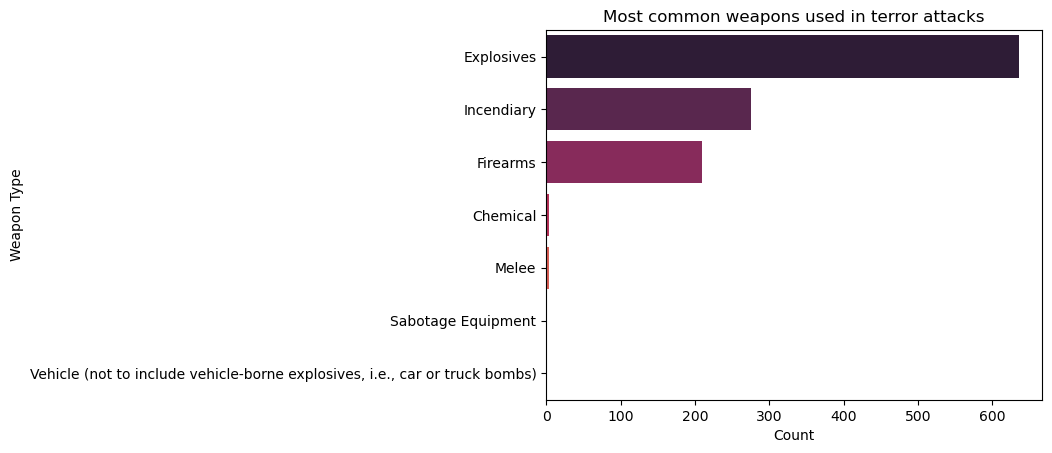

In [50]:
# Visualising the above data
# f, axis = plt.subplots(figsize = (15,10))
x = sns.barplot(x="Count", y="Weapon_type",data=weapon_cnt[:7],
               palette='rocket').set_title('Most common weapons used in terror attacks')
plt.ylabel("Weapon Type")

# Most prevalent type of attacks

In [27]:
attacks = clean_data[clean_data['AttackType']!='Unknown']
attack_cnt = attacks['AttackType'].value_counts().reset_index()
attack_cnt.rename(columns={"index":"AttackType", "AttackType":"Count"}, inplace=True)
attack_cnt

,AttackType,Count
0,Bombing/Explosion,621
1,Facility/Infrastructure Attack,269
2,Assassination,115
3,Armed Assault,109
4,Hostage Taking (Kidnapping),60
5,Hijacking,19
6,Hostage Taking (Barricade Incident),4
7,Unarmed Assault,3


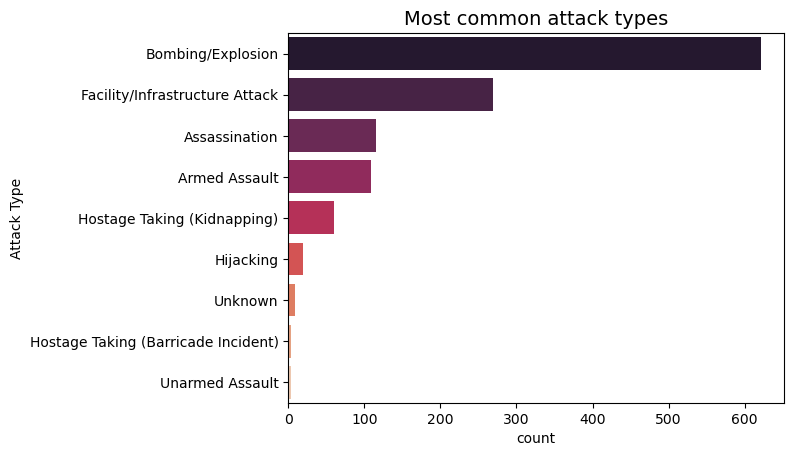

In [57]:
# Visualising the above data
sns.countplot(y='AttackType', data=clean_data, palette='rocket', order=clean_data['AttackType'].value_counts().index)
plt.ylabel("Attack Type", size=10)
plt.title('Most common attack types', size=14)
plt.show()

# Customary targets for terror attacks

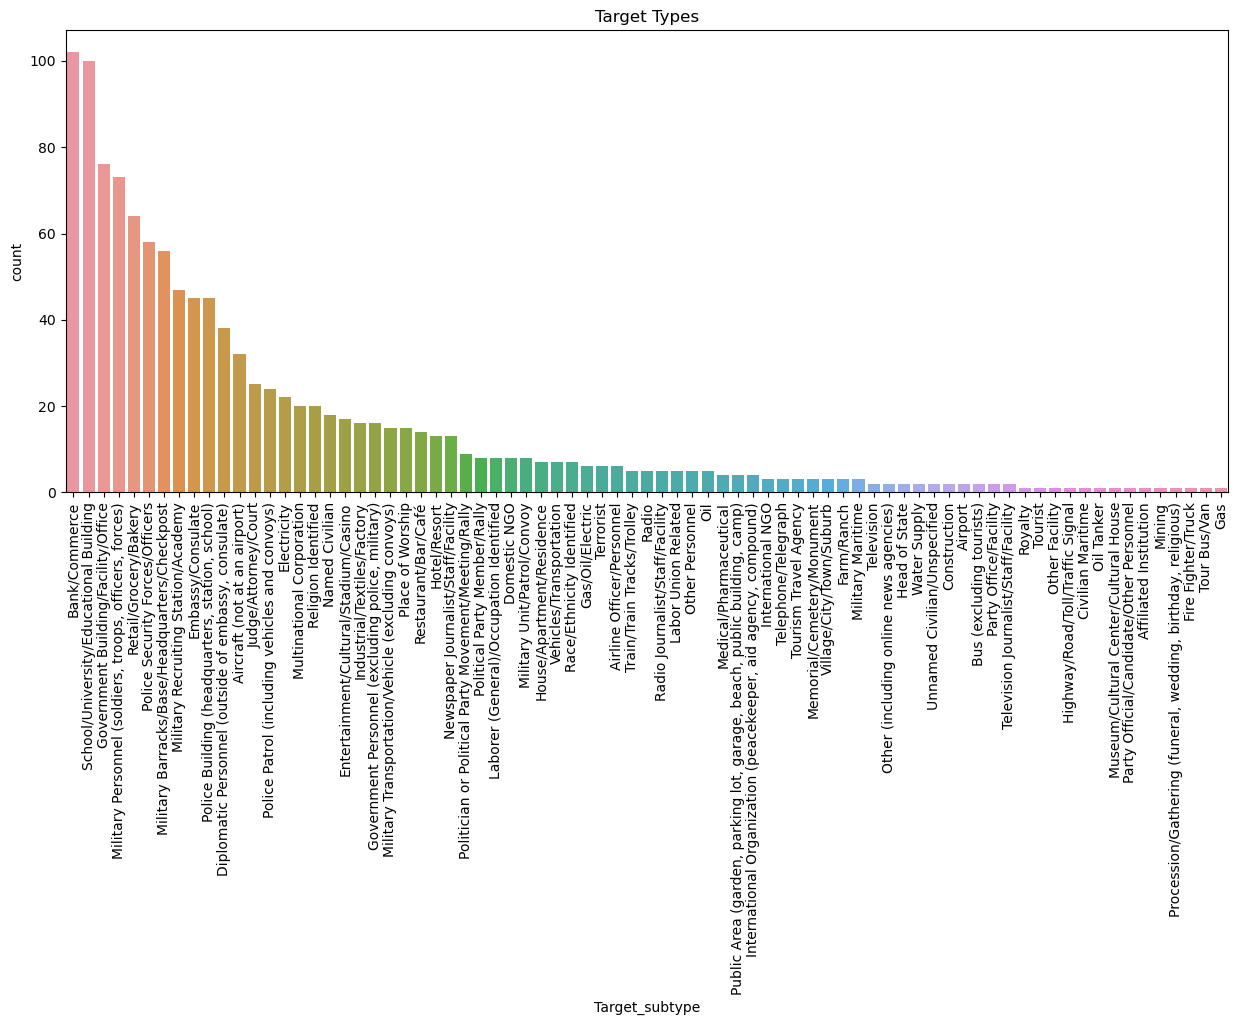

In [59]:
plt.subplots(figsize=(15,6), dpi = 100)
sns.countplot(x=clean_data['Target_subtype'], order=clean_data['Target_subtype'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Target Types')
plt.show()

# Representation of common targets in a histogram

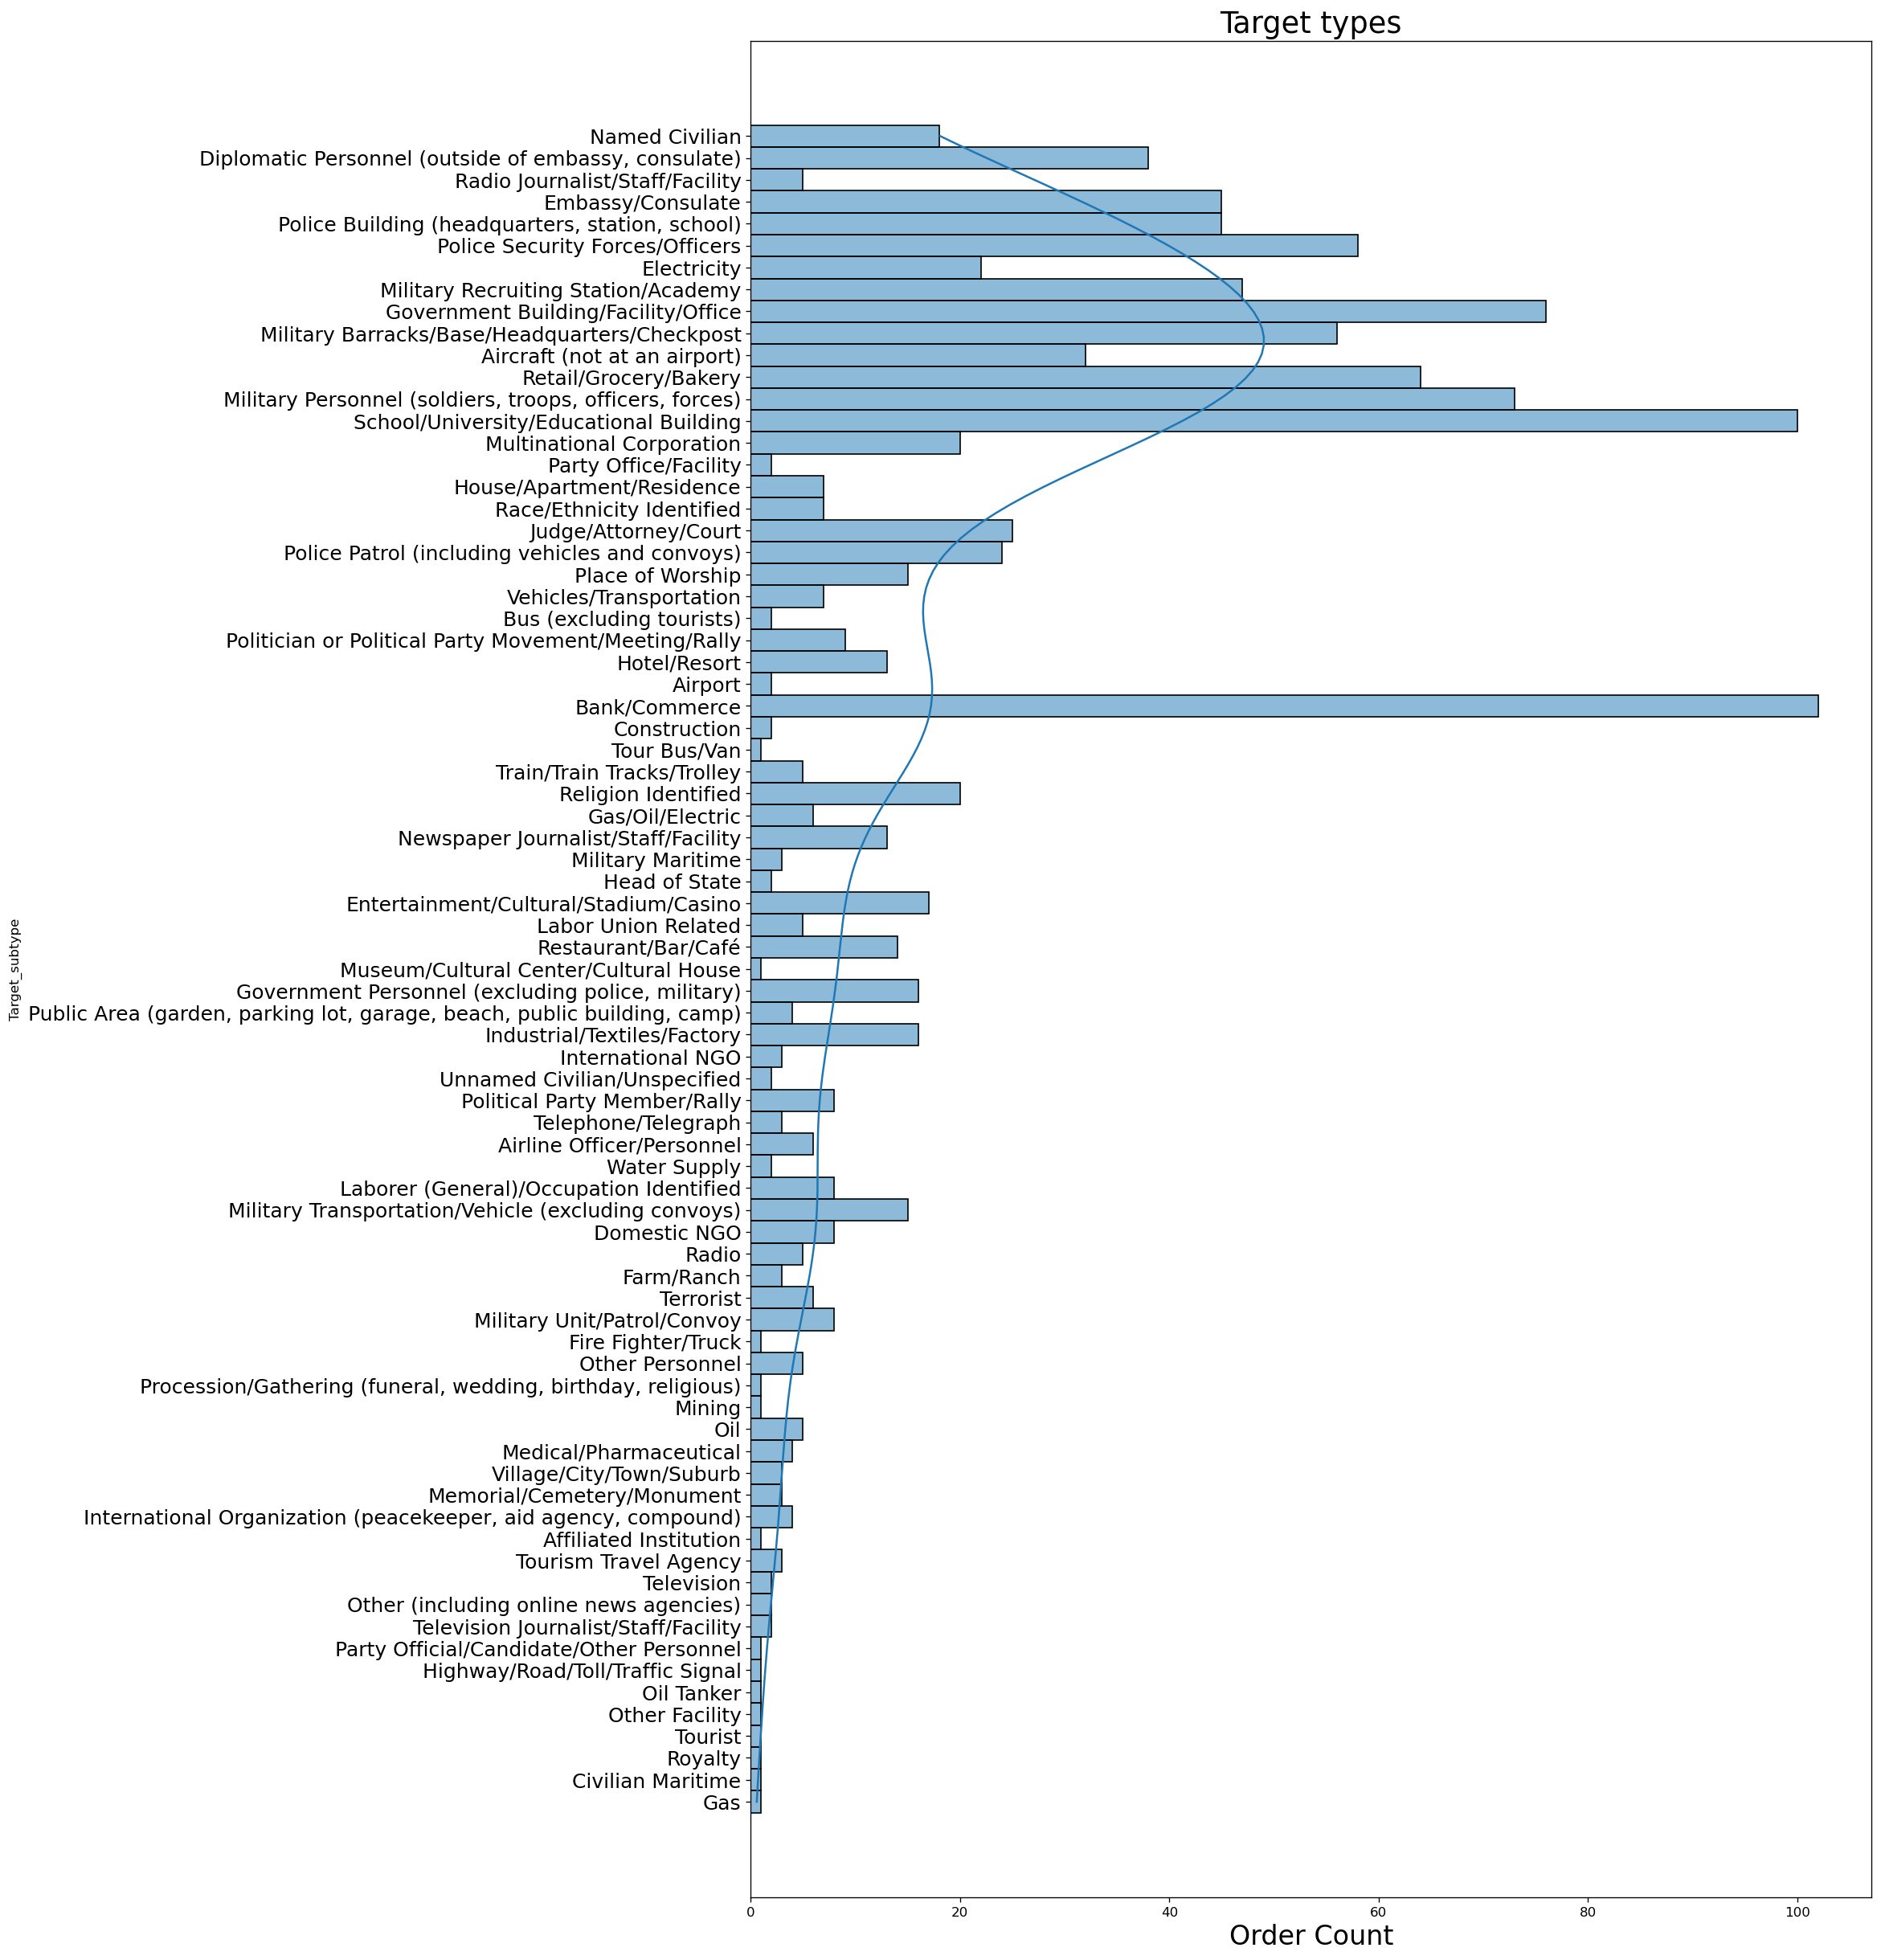

In [32]:
plt.figure(figsize=(15,25), dpi=120)
sns.histplot(data=clean_data, y='Target_subtype', bins=15, kde=True)
plt.xlabel('Order Count', size=20)
plt.yticks(size=15)
plt.title('Target types', size=22)
plt.show()